In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv(r"C:\Users\danie\Downloads\10.000_Empresas_mas_Grandes_del_País_20251121.csv")
df.head(3)

,NIT,RAZÓN SOCIAL,SUPERVISOR,REGIÓN,DEPARTAMENTO DOMICILIO,CIUDAD DOMICILIO,CIIU,MACROSECTOR,INGRESOS OPERACIONALES,GANANCIA (PÉRDIDA),TOTAL ACTIVOS,TOTAL PASIVOS,TOTAL PATRIMONIO,Año de Corte
0,"899,999,068",ECOPETROL S.A,SUPERFINANCIERA,Bogotá - Cundinamarca,BOGOTA D.C.,BOGOTA D.C.-BOGOTA D.C.,610,MINERO,$144.82,$33.41,$216.85,$125.81,$91.03,"2,022"
1,"900,112,515",REFINERIA DE CARTAGENA S.A.S,SUPERSOCIEDADES,Costa Atlántica,BOLIVAR,CARTAGENA-BOLIVAR,"1,921",MANUFACTURA,$27.86,$2.19,$42.84,$16.48,$26.36,"2,022"
2,"830,095,213",ORGANIZACIÓN TERPEL S.A.,SUPERFINANCIERA,Bogotá - Cundinamarca,BOGOTA D.C.,BOGOTA D.C.-BOGOTA D.C.,"4,661",COMERCIO,$23.60,$0.33,$7.48,$4.47,$3.01,"2,022"


In [3]:
df[df.isnull().any(axis=1)]

,NIT,RAZÓN SOCIAL,SUPERVISOR,REGIÓN,DEPARTAMENTO DOMICILIO,CIUDAD DOMICILIO,CIIU,MACROSECTOR,INGRESOS OPERACIONALES,GANANCIA (PÉRDIDA),TOTAL ACTIVOS,TOTAL PASIVOS,TOTAL PATRIMONIO,Año de Corte
3532,"830,065,974",NaN,SUPERSOCIEDADES,Bogotá - Cundinamarca,BOGOTA D.C.,BOGOTA D.C.-BOGOTA D.C.,"7,730",SERVICIOS,$0.06,-$0.02,$0.08,$0.10,-$0.02,"2,022"
13550,"830,065,974",NaN,SUPERSOCIEDADES,Bogotá - Cundinamarca,BOGOTA D.C.,BOGOTA D.C.-BOGOTA D.C.,"7,730",SERVICIOS,$0.05,-$0.03,$0.08,$0.12,-$0.04,"2,021"


In [4]:
# Los únicos NaNs que hay son la Razón Social (el nombre) de dos empresas. No creo que merezca eliminar esas filas, solo le voy a poner el nombre de Faltante para identificarlas.
mask = df["RAZÓN SOCIAL"].isnull()
faltantes = [f"Faltante{i+1}" for i in range(mask.sum())]
df.loc[mask, "RAZÓN SOCIAL"] = faltantes

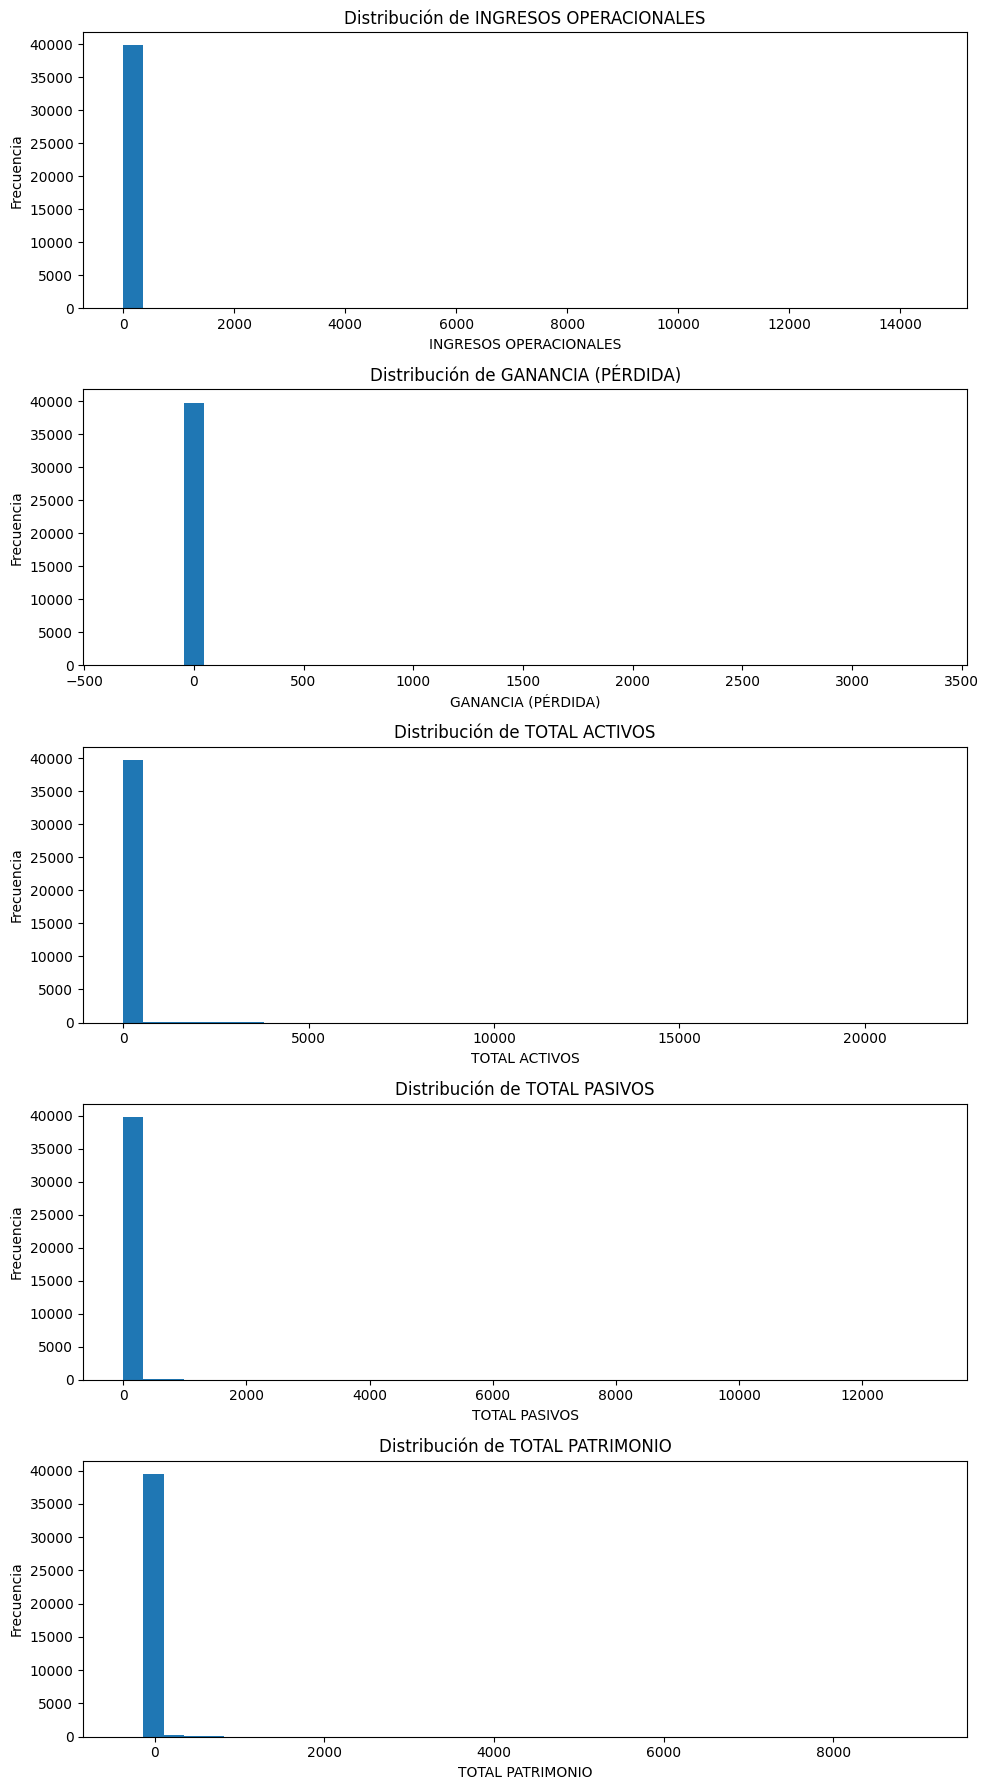

In [5]:
import matplotlib.pyplot as plt

cols = [
    "INGRESOS OPERACIONALES",
    "GANANCIA (PÉRDIDA)",
    "TOTAL ACTIVOS",
    "TOTAL PASIVOS",
    "TOTAL PATRIMONIO"
]

# Convertir a número
for c in cols:
    df[c] = df[c].astype(str)\
                 .str.replace("$", "", regex=False)\
                 .str.replace(".", "", regex=False)\
                 .str.replace(",", ".", regex=False)\
                 .astype(float)

plt.figure(figsize=(10, 18))

for i, col in enumerate(cols, 1):
    plt.subplot(5, 1, i)
    plt.hist(df[col], bins=40)
    plt.title(f"Distribución de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()


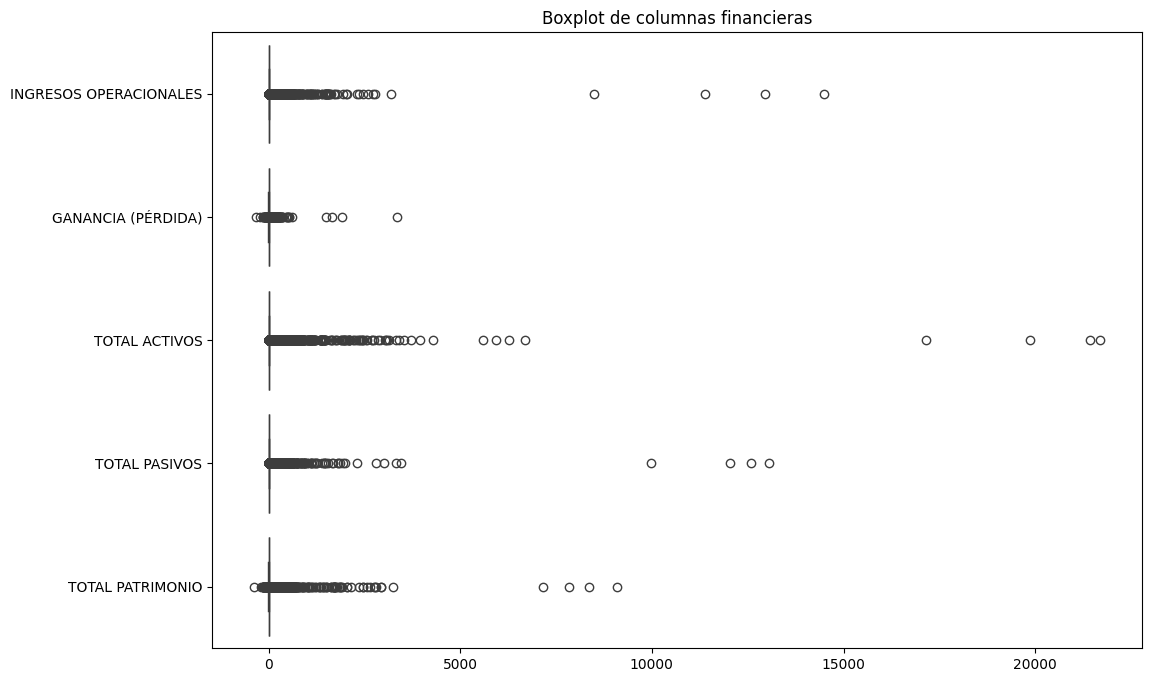

In [6]:
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.boxplot(data=df[cols], orient="h")
plt.title("Boxplot de columnas financieras")
plt.show()


# Identificar Outliers

In [8]:
def detectar_outliers_iqr(df, cols):
    outliers_idx = set()
    for col in cols:
        if df[col].dropna().empty:
            continue
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR
        outliers = df[(df[col] < limite_inferior) | (df[col] > limite_superior)].index
        outliers_idx.update(outliers)
    return list(outliers_idx)

outlier_indices = detectar_outliers_iqr(df, cols)

df_outliers = df.loc[outlier_indices].copy()

print(f"Filas con outliers: {df_outliers['NIT'].unique().shape[0]} de {df['NIT'].unique().shape[0]} en todo el dataset -> = {df_outliers['NIT'].unique().shape[0] / df['NIT'].unique().shape[0] * 100:.2f}%")
df_outliers.head()


Filas con outliers: 3164 de 13976 en todo el dataset -> = 22.64%


,NIT,RAZÓN SOCIAL,SUPERVISOR,REGIÓN,DEPARTAMENTO DOMICILIO,CIUDAD DOMICILIO,CIIU,MACROSECTOR,INGRESOS OPERACIONALES,GANANCIA (PÉRDIDA),TOTAL ACTIVOS,TOTAL PASIVOS,TOTAL PATRIMONIO,Año de Corte
0,"899,999,068",ECOPETROL S.A,SUPERFINANCIERA,Bogotá - Cundinamarca,BOGOTA D.C.,BOGOTA D.C.-BOGOTA D.C.,610,MINERO,14482.0,3341.0,21685.0,12581.0,9103.0,"2,022"
1,"900,112,515",REFINERIA DE CARTAGENA S.A.S,SUPERSOCIEDADES,Costa Atlántica,BOLIVAR,CARTAGENA-BOLIVAR,"1,921",MANUFACTURA,2786.0,219.0,4284.0,1648.0,2636.0,"2,022"
2,"830,095,213",ORGANIZACIÓN TERPEL S.A.,SUPERFINANCIERA,Bogotá - Cundinamarca,BOGOTA D.C.,BOGOTA D.C.-BOGOTA D.C.,"4,661",COMERCIO,2360.0,33.0,748.0,447.0,301.0,"2,022"
3,"860,069,804",CARBONES DEL CERREJON LIMITED,SUPERSOCIEDADES,Bogotá - Cundinamarca,BOGOTA D.C.,BOGOTA D.C.-BOGOTA D.C.,510,MINERO,1639.0,605.0,1045.0,900.0,145.0,"2,022"
4,"800,021,308",DRUMMOND LTD,SUPERSOCIEDADES,Bogotá - Cundinamarca,BOGOTA D.C.,BOGOTA D.C.-BOGOTA D.C.,510,MINERO,1527.0,216.0,1427.0,634.0,793.0,"2,022"


### El porcentaje es muy alto, intentemos normalizar primero los datos

In [9]:
from scipy.stats import boxcox

cols_boxcox = []
for c in cols:
    min_val = df[c].min()
    shift = abs(min_val) + 1 if min_val <= 0 else 0
    transformed, lmbda = boxcox(df[c] + shift)
    new_col = c + "_boxcox"
    df[new_col] = transformed
    cols_boxcox.append(new_col)
    print(f"Columna: {c}, Lambda: {lmbda}")

def detectar_outliers_iqr(df, cols):
    outliers_idx = set()
    for col in cols:
        if df[col].dropna().empty:
            continue
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        limite_inferior = Q1 - 3 * IQR
        limite_superior = Q3 + 3 * IQR
        outliers = df[(df[col] < limite_inferior) | (df[col] > limite_superior)].index
        outliers_idx.update(outliers)
    return list(outliers_idx)

outlier_indices_boxcox = detectar_outliers_iqr(df, cols_boxcox)

df_outliers_boxcox = df.loc[outlier_indices_boxcox].copy()

print(f"Filas con outliers: {df_outliers_boxcox['NIT'].unique().shape[0]} de {df['NIT'].unique().shape[0]} en todo el dataset -> = {df_outliers_boxcox['NIT'].unique().shape[0] / df['NIT'].unique().shape[0] * 100:.2f}%")
df_outliers_boxcox.head()


Columna: INGRESOS OPERACIONALES, Lambda: -0.3973021023693149
Columna: GANANCIA (PÉRDIDA), Lambda: 0.16865239046175956
Columna: TOTAL ACTIVOS, Lambda: -0.4029060267423137
Columna: TOTAL PASIVOS, Lambda: -0.4457929451851623
Columna: TOTAL PATRIMONIO, Lambda: -0.09546032417517186
Filas con outliers: 1606 de 13976 en todo el dataset -> = 11.49%


,NIT,RAZÓN SOCIAL,SUPERVISOR,REGIÓN,DEPARTAMENTO DOMICILIO,CIUDAD DOMICILIO,CIIU,MACROSECTOR,INGRESOS OPERACIONALES,GANANCIA (PÉRDIDA),TOTAL ACTIVOS,TOTAL PASIVOS,TOTAL PATRIMONIO,Año de Corte,INGRESOS OPERACIONALES_boxcox,GANANCIA (PÉRDIDA)_boxcox,TOTAL ACTIVOS_boxcox,TOTAL PASIVOS_boxcox,TOTAL PATRIMONIO_boxcox
0,"899,999,068",ECOPETROL S.A,SUPERFINANCIERA,Bogotá - Cundinamarca,BOGOTA D.C.,BOGOTA D.C.-BOGOTA D.C.,610,MINERO,14482.0,3341.0,21685.0,12581.0,9103.0,"2,022",2.461030,17.732953,2.437534,2.209834,6.104561
1,"900,112,515",REFINERIA DE CARTAGENA S.A.S,SUPERSOCIEDADES,Costa Atlántica,BOLIVAR,CARTAGENA-BOLIVAR,"1,921",MANUFACTURA,2786.0,219.0,4284.0,1648.0,2636.0,"2,022",2.409285,11.208945,2.396568,2.160656,5.598395
2,"830,095,213",ORGANIZACIÓN TERPEL S.A.,SUPERFINANCIERA,Bogotá - Cundinamarca,BOGOTA D.C.,BOGOTA D.C.-BOGOTA D.C.,"4,661",COMERCIO,2360.0,33.0,748.0,447.0,301.0,"2,022",2.401946,10.033464,2.309524,2.095642,4.847775
3,"860,069,804",CARBONES DEL CERREJON LIMITED,SUPERSOCIEDADES,Bogotá - Cundinamarca,BOGOTA D.C.,BOGOTA D.C.-BOGOTA D.C.,510,MINERO,1639.0,605.0,1045.0,900.0,145.0,"2,022",2.384017,12.838411,2.331235,2.135132,4.703812
4,"800,021,308",DRUMMOND LTD,SUPERSOCIEDADES,Bogotá - Cundinamarca,BOGOTA D.C.,BOGOTA D.C.-BOGOTA D.C.,510,MINERO,1527.0,216.0,1427.0,634.0,793.0,"2,022",2.380225,11.192880,2.349003,2.116892,5.135623


In [10]:
import pandas as pd
import numpy as np
from scipy.stats import gaussian_kde

# Columnas financieras originales
cols = [
    "INGRESOS OPERACIONALES",
    "GANANCIA (PÉRDIDA)",
    "TOTAL ACTIVOS",
    "TOTAL PASIVOS",
    "TOTAL PATRIMONIO"
]

# 1️⃣ Limpiar y convertir a numérico
for c in cols:
    df[c] = (
        df[c].astype(str)
             .str.replace("$", "", regex=False)
             .str.replace(".", "", regex=False)
             .str.replace(",", ".", regex=False)
    )
    df[c] = pd.to_numeric(df[c], errors='coerce')

# 2️⃣ Función para detectar outliers usando KDE
def detectar_outliers_kde(df, cols, quantile_thresh=0.01):
    outliers_idx = set()
    for col in cols:
        data = df[col].dropna().values
        if len(data) == 0:
            continue
        kde = gaussian_kde(data)
        densidades = kde(data)
        
        # Consideramos outliers los puntos con densidad muy baja
        threshold = np.quantile(densidades, quantile_thresh)
        outliers = df[col][densidades < threshold].index
        outliers_idx.update(outliers)
    return list(outliers_idx)

# 3️⃣ Detectar outliers en todo el DataFrame
outlier_indices_kde = detectar_outliers_kde(df, cols, quantile_thresh=0.01)

# 4️⃣ Crear DataFrame final con todas las columnas originales
df_outliers_kde = df.loc[outlier_indices_kde].copy()

# 5️⃣ Revisar resultados
total_outliers = df_outliers_kde['NIT'].unique().shape[0]
total_rows = df['NIT'].unique().shape[0]
print(f"Filas con outliers (KDE): {total_outliers} de {total_rows} en todo el dataset -> {total_outliers / total_rows * 100:.2f}%")

df_outliers_kde.head()


Filas con outliers (KDE): 315 de 13976 en todo el dataset -> 2.25%


,NIT,RAZÓN SOCIAL,SUPERVISOR,REGIÓN,DEPARTAMENTO DOMICILIO,CIUDAD DOMICILIO,CIIU,MACROSECTOR,INGRESOS OPERACIONALES,GANANCIA (PÉRDIDA),TOTAL ACTIVOS,TOTAL PASIVOS,TOTAL PATRIMONIO,Año de Corte,INGRESOS OPERACIONALES_boxcox,GANANCIA (PÉRDIDA)_boxcox,TOTAL ACTIVOS_boxcox,TOTAL PASIVOS_boxcox,TOTAL PATRIMONIO_boxcox
0,"899,999,068",ECOPETROL S.A,SUPERFINANCIERA,Bogotá - Cundinamarca,BOGOTA D.C.,BOGOTA D.C.-BOGOTA D.C.,610,MINERO,144820,33410,216850,125810,91030,"2,022",2.461030,17.732953,2.437534,2.209834,6.104561
1,"900,112,515",REFINERIA DE CARTAGENA S.A.S,SUPERSOCIEDADES,Costa Atlántica,BOLIVAR,CARTAGENA-BOLIVAR,"1,921",MANUFACTURA,27860,2190,42840,16480,26360,"2,022",2.409285,11.208945,2.396568,2.160656,5.598395
2,"830,095,213",ORGANIZACIÓN TERPEL S.A.,SUPERFINANCIERA,Bogotá - Cundinamarca,BOGOTA D.C.,BOGOTA D.C.-BOGOTA D.C.,"4,661",COMERCIO,23600,330,7480,4470,3010,"2,022",2.401946,10.033464,2.309524,2.095642,4.847775
3,"860,069,804",CARBONES DEL CERREJON LIMITED,SUPERSOCIEDADES,Bogotá - Cundinamarca,BOGOTA D.C.,BOGOTA D.C.-BOGOTA D.C.,510,MINERO,16390,6050,10450,9000,1450,"2,022",2.384017,12.838411,2.331235,2.135132,4.703812
4,"800,021,308",DRUMMOND LTD,SUPERSOCIEDADES,Bogotá - Cundinamarca,BOGOTA D.C.,BOGOTA D.C.-BOGOTA D.C.,510,MINERO,15270,2160,14270,6340,7930,"2,022",2.380225,11.192880,2.349003,2.116892,5.135623


### Probamos KDE en lugar de IQR

In [12]:
import pandas as pd
import numpy as np
from scipy.stats import boxcox, gaussian_kde

# Columnas financieras originales
cols = [
    "INGRESOS OPERACIONALES",
    "GANANCIA (PÉRDIDA)",
    "TOTAL ACTIVOS",
    "TOTAL PASIVOS",
    "TOTAL PATRIMONIO"
]

# 1️⃣ Limpiar y convertir a numérico
for c in cols:
    df[c] = (
        df[c].astype(str)
             .str.replace("$", "", regex=False)
             .str.replace(".", "", regex=False)
             .str.replace(",", ".", regex=False)
    )
    df[c] = pd.to_numeric(df[c], errors='coerce')

# 2️⃣ Aplicar Box-Cox (con shift si hay valores <=0)
cols_boxcox = []
for c in cols:
    min_val = df[c].min()
    shift = abs(min_val) + 1 if min_val <= 0 else 0
    transformed, lmbda = boxcox(df[c] + shift)
    new_col = c + "_boxcox"
    df[new_col] = transformed
    cols_boxcox.append(new_col)
    print(f"Columna: {c}, Lambda: {lmbda:.4f}, Shift aplicado: {shift}")

# 3️⃣ Función para detectar outliers usando KDE sobre los datos Box-Cox
def detectar_outliers_kde(df, cols, quantile_thresh=0.01):
    outliers_idx = set()
    for col in cols:
        data = df[col].dropna().values
        if len(data) == 0:
            continue
        kde = gaussian_kde(data)
        densidades = kde(data)
        
        # Consideramos outliers los puntos con densidad muy baja
        threshold = np.quantile(densidades, quantile_thresh)
        outliers = df[col][densidades < threshold].index
        outliers_idx.update(outliers)
    return list(outliers_idx)

# 4️⃣ Detectar outliers en todo el DataFrame usando columnas Box-Cox
outlier_indices = detectar_outliers_kde(df, cols_boxcox, quantile_thresh=0.01)

# 5️⃣ Crear DataFrame final con todas las columnas originales
df_outliers = df.loc[outlier_indices].copy()

# 6️⃣ Revisar resultados
total_outliers = df_outliers['NIT'].unique().shape[0]
total_rows = df['NIT'].unique().shape[0]
print(f"Filas con outliers detectados: {total_outliers} de {total_rows} ({total_outliers / total_rows * 100:.2f}%)")

df_outliers.head()


Columna: INGRESOS OPERACIONALES, Lambda: -0.3973, Shift aplicado: 0
Columna: GANANCIA (PÉRDIDA), Lambda: 0.2309, Shift aplicado: 3211
Columna: TOTAL ACTIVOS, Lambda: -0.0748, Shift aplicado: 1
Columna: TOTAL PASIVOS, Lambda: -0.0103, Shift aplicado: 1
Columna: TOTAL PATRIMONIO, Lambda: 0.0076, Shift aplicado: 3691
Filas con outliers detectados: 322 de 13976 (2.30%)


,NIT,RAZÓN SOCIAL,SUPERVISOR,REGIÓN,DEPARTAMENTO DOMICILIO,CIUDAD DOMICILIO,CIIU,MACROSECTOR,INGRESOS OPERACIONALES,GANANCIA (PÉRDIDA),...,INGRESOS OPERACIONALES_boxcox,GANANCIA (PÉRDIDA)_boxcox,TOTAL ACTIVOS_boxcox,TOTAL PASIVOS_boxcox,TOTAL PATRIMONIO_boxcox,INGRESOS OPERACIONALES_kde,GANANCIA (PÉRDIDA)_kde,TOTAL ACTIVOS_kde,TOTAL PASIVOS_kde,TOTAL PATRIMONIO_kde
0,"899,999,068",ECOPETROL S.A,SUPERFINANCIERA,Bogotá - Cundinamarca,BOGOTA D.C.,BOGOTA D.C.-BOGOTA D.C.,610,MINERO,144820,33410,...,2.494565,44.695678,8.037150,11.059388,11.973741,1.677591e+07,3.059450e+06,2.853752e+07,1.619990e+07,1.345849e+07
1,"900,112,515",REFINERIA DE CARTAGENA S.A.S,SUPERSOCIEDADES,Costa Atlántica,BOLIVAR,CARTAGENA-BOLIVAR,"1,921",MANUFACTURA,27860,2190,...,2.473836,27.180763,7.349213,9.239631,10.726435,1.677385e+07,1.087989e+06,2.853752e+07,1.596776e+07,1.345844e+07
2,"830,095,213",ORGANIZACIÓN TERPEL S.A.,SUPERFINANCIERA,Bogotá - Cundinamarca,BOGOTA D.C.,BOGOTA D.C.-BOGOTA D.C.,"4,661",COMERCIO,23600,330,...,2.470896,24.253645,6.509533,8.051369,9.112406,1.670070e+07,5.224617e+04,1.558122e+06,1.318388e+06,6.562213e+05
3,"860,069,804",CARBONES DEL CERREJON LIMITED,SUPERSOCIEDADES,Bogotá - Cundinamarca,BOGOTA D.C.,BOGOTA D.C.-BOGOTA D.C.,510,MINERO,16390,6050,...,2.463714,31.359445,6.678995,8.690684,8.829285,1.418698e+07,3.059450e+06,3.546000e+06,5.329524e+06,1.827468e+05
4,"800,021,308",DRUMMOND LTD,SUPERSOCIEDADES,Bogotá - Cundinamarca,BOGOTA D.C.,BOGOTA D.C.-BOGOTA D.C.,510,MINERO,15270,2160,...,2.462195,27.140257,6.833134,8.371204,9.702422,3.510597e+06,1.318544e+06,3.916897e+06,2.276936e+06,4.718956e+06


### KDE pero aplicado a cada MACROSECTOR y año

In [13]:
import pandas as pd
import numpy as np
from scipy.stats import boxcox, gaussian_kde

# Columnas financieras originales
cols = [
    "INGRESOS OPERACIONALES",
    "GANANCIA (PÉRDIDA)",
    "TOTAL ACTIVOS",
    "TOTAL PASIVOS",
    "TOTAL PATRIMONIO"
]

# 1️⃣ Limpiar y convertir a numérico
for c in cols:
    df[c] = (
        df[c].astype(str)
             .str.replace("$", "", regex=False)
             .str.replace(".", "", regex=False)
             .str.replace(",", ".", regex=False)
    )
    df[c] = pd.to_numeric(df[c], errors='coerce')

# 2️⃣ Aplicar Box-Cox (con shift si hay valores <=0)
cols_boxcox = []
for c in cols:
    min_val = df[c].min()
    shift = abs(min_val) + 1 if min_val <= 0 else 0
    transformed, lmbda = boxcox(df[c] + shift)
    new_col = c + "_boxcox"
    df[new_col] = transformed
    cols_boxcox.append(new_col)
    print(f"Columna: {c}, Lambda: {lmbda:.4f}, Shift aplicado: {shift}")

# 3️⃣ Función para detectar outliers usando KDE
def detectar_outliers_kde(df, cols, quantile_thresh=0.01):
    outliers_idx = set()
    for col in cols:
        data = df[col].dropna().values
        if len(data) == 0:
            continue
        kde = gaussian_kde(data)
        densidades = kde(data)
        
        # Consideramos outliers los puntos con densidad muy baja
        threshold = np.quantile(densidades, quantile_thresh)
        outliers = df[col][densidades < threshold].index
        outliers_idx.update(outliers)
    return list(outliers_idx)

# 4️⃣ Detectar outliers por MACROSECTOR y Año de Corte
outlier_indices = set()
for sector in df['MACROSECTOR'].unique():
    for año in df['Año de Corte'].unique():
        df_seg = df[(df['MACROSECTOR'] == sector) & (df['Año de Corte'] == año)]
        if not df_seg.empty:
            idx = detectar_outliers_kde(df_seg, cols_boxcox, quantile_thresh=0.01)
            outlier_indices.update(idx)

# 5️⃣ Crear DataFrame final con todas las columnas originales
df_outliers = df.loc[list(outlier_indices)].copy()

# 6️⃣ Revisar resultados
total_outliers = df_outliers['NIT'].unique().shape[0]
total_rows = df['NIT'].unique().shape[0]
print(f"Filas con outliers detectados por MACROSECTOR y Año: {total_outliers} de {total_rows} ({total_outliers / total_rows * 100:.2f}%)")

df_outliers.head()


Columna: INGRESOS OPERACIONALES, Lambda: -0.3973, Shift aplicado: 0
Columna: GANANCIA (PÉRDIDA), Lambda: 0.2309, Shift aplicado: 3211
Columna: TOTAL ACTIVOS, Lambda: -0.0748, Shift aplicado: 1
Columna: TOTAL PASIVOS, Lambda: -0.0103, Shift aplicado: 1
Columna: TOTAL PATRIMONIO, Lambda: 0.0076, Shift aplicado: 3691
Filas con outliers detectados por MACROSECTOR y Año: 406 de 13976 (2.90%)


,NIT,RAZÓN SOCIAL,SUPERVISOR,REGIÓN,DEPARTAMENTO DOMICILIO,CIUDAD DOMICILIO,CIIU,MACROSECTOR,INGRESOS OPERACIONALES,GANANCIA (PÉRDIDA),...,INGRESOS OPERACIONALES_boxcox,GANANCIA (PÉRDIDA)_boxcox,TOTAL ACTIVOS_boxcox,TOTAL PASIVOS_boxcox,TOTAL PATRIMONIO_boxcox,INGRESOS OPERACIONALES_kde,GANANCIA (PÉRDIDA)_kde,TOTAL ACTIVOS_kde,TOTAL PASIVOS_kde,TOTAL PATRIMONIO_kde
0,"899,999,068",ECOPETROL S.A,SUPERFINANCIERA,Bogotá - Cundinamarca,BOGOTA D.C.,BOGOTA D.C.-BOGOTA D.C.,610,MINERO,144820,33410,...,2.494565,44.695678,8.037150,11.059388,11.973741,1.677591e+07,3.059450e+06,2.853752e+07,1.619990e+07,1.345849e+07
1,"900,112,515",REFINERIA DE CARTAGENA S.A.S,SUPERSOCIEDADES,Costa Atlántica,BOLIVAR,CARTAGENA-BOLIVAR,"1,921",MANUFACTURA,27860,2190,...,2.473836,27.180763,7.349213,9.239631,10.726435,1.677385e+07,1.087989e+06,2.853752e+07,1.596776e+07,1.345844e+07
2,"830,095,213",ORGANIZACIÓN TERPEL S.A.,SUPERFINANCIERA,Bogotá - Cundinamarca,BOGOTA D.C.,BOGOTA D.C.-BOGOTA D.C.,"4,661",COMERCIO,23600,330,...,2.470896,24.253645,6.509533,8.051369,9.112406,1.670070e+07,5.224617e+04,1.558122e+06,1.318388e+06,6.562213e+05
3,"860,069,804",CARBONES DEL CERREJON LIMITED,SUPERSOCIEDADES,Bogotá - Cundinamarca,BOGOTA D.C.,BOGOTA D.C.-BOGOTA D.C.,510,MINERO,16390,6050,...,2.463714,31.359445,6.678995,8.690684,8.829285,1.418698e+07,3.059450e+06,3.546000e+06,5.329524e+06,1.827468e+05
4,"800,021,308",DRUMMOND LTD,SUPERSOCIEDADES,Bogotá - Cundinamarca,BOGOTA D.C.,BOGOTA D.C.-BOGOTA D.C.,510,MINERO,15270,2160,...,2.462195,27.140257,6.833134,8.371204,9.702422,3.510597e+06,1.318544e+06,3.916897e+06,2.276936e+06,4.718956e+06


In [14]:
df = df.drop(index=list(outlier_indices)).copy()
df

,NIT,RAZÓN SOCIAL,SUPERVISOR,REGIÓN,DEPARTAMENTO DOMICILIO,CIUDAD DOMICILIO,CIIU,MACROSECTOR,INGRESOS OPERACIONALES,GANANCIA (PÉRDIDA),...,INGRESOS OPERACIONALES_boxcox,GANANCIA (PÉRDIDA)_boxcox,TOTAL ACTIVOS_boxcox,TOTAL PASIVOS_boxcox,TOTAL PATRIMONIO_boxcox,INGRESOS OPERACIONALES_kde,GANANCIA (PÉRDIDA)_kde,TOTAL ACTIVOS_kde,TOTAL PASIVOS_kde,TOTAL PATRIMONIO_kde
27,"900,268,747",PAREX RESOURCES (COLOMBIA) AG SUCURSAL,SUPERSOCIEDADES,Bogotá - Cundinamarca,BOGOTA D.C.,BOGOTA D.C.-BOGOTA D.C.,610,MINERO,5500,2490,...,2.434785,27.576599,6.731903,8.246246,9.517429,1.797339e+06,8.480834e+05,3.563936e+06,1.383351e+06,2.395915e+06
28,"830,126,302","FRONTERA ENERGY COLOMBIA CORP., SUCURSAL COLOMBIA",SUPERSOCIEDADES,Bogotá - Cundinamarca,BOGOTA D.C.,BOGOTA D.C.-BOGOTA D.C.,610,MINERO,5150,1620,...,2.432610,26.379528,6.586631,7.342881,9.575077,2.063940e+06,1.301196e+06,2.666055e+06,3.018790e+05,1.653278e+06
38,"900,493,698",GEOPARK COLOMBIA SAS,SUPERSOCIEDADES,Bogotá - Cundinamarca,BOGOTA D.C.,BOGOTA D.C.-BOGOTA D.C.,610,MINERO,4140,1210,...,2.424966,25.756965,6.255464,7.528083,8.950860,1.004904e+06,7.883087e+05,7.960970e+05,3.843392e+05,2.952258e+05
42,"860,069,378",CERRO MATOSO S.A.,SUPERSOCIEDADES,Bogotá - Cundinamarca,BOGOTA D.C.,BOGOTA D.C.-BOGOTA D.C.,723,MINERO,3900,1290,...,2.422757,25.881828,6.103873,7.075245,8.922682,8.890656e+05,9.786528e+05,4.673134e+05,1.665310e+05,3.282689e+05
54,"860,072,134",HOCOL S.A.,SUPERSOCIEDADES,Bogotá - Cundinamarca,BOGOTA D.C.,BOGOTA D.C.-BOGOTA D.C.,610,MINERO,3250,530,...,2.415678,24.618636,6.285750,7.338407,9.080005,7.349944e+05,1.586522e+05,9.884822e+05,2.995594e+05,4.632855e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,"901,266,264",ALIA2 DISTRIBUCIONES S.A.S.,SUPERSOCIEDADES,Costa Atlántica,BOLIVAR,CARTAGENA-BOLIVAR,"4,719",COMERCIO,20,0,...,1.751420,23.615137,0.000000,0.000000,8.476091,4.891630e+02,8.283292e+01,7.998763e+02,4.499299e+02,3.750932e+02
39996,"900,584,429",C I UNIPACK COLOMBIA SAS,SUPERSOCIEDADES,Costa Atlántica,ATLANTICO,BARRANQUILLA-ATLANTICO,"1,709",MANUFACTURA,20,0,...,1.751420,23.615137,2.195207,0.000000,8.478972,4.891630e+02,8.283292e+01,7.948887e+02,4.499299e+02,3.713764e+02
39997,"807,009,474",DROGAS UNIDAS SAS,SUPERSOCIEDADES,Centro - Oriente,NORTE DE SANTANDER,CUCUTA-NORTE DE SANTANDER,"4,645",COMERCIO,20,0,...,1.751420,23.615137,2.195207,0.000000,8.476091,4.891630e+02,8.283292e+01,7.948887e+02,4.499299e+02,3.750932e+02
39998,"830,066,984",REDES Y PROYECTOS DE ENERGIA S A EMPRESA MULTI...,SUPERSOCIEDADES,Bogotá - Cundinamarca,BOGOTA D.C.,BOGOTA D.C.-BOGOTA D.C.,"4,390",CONSTRUCCIÓN,20,0,...,1.751420,23.615137,3.242548,4.024953,8.470307,4.891630e+02,8.283292e+01,7.855217e+02,4.491671e+02,3.886566e+02
